<a href="https://colab.research.google.com/github/mkayanda/Personal_Projects/blob/master/MaleFemaleclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the packages / dependencies
import numpy as np
#import mnist
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import load_img 
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
!wget https://www.dropbox.com/s/nov493om2jmh2gp/male_female.tgz?dl=0 -O male_female.tgz



--2020-07-08 22:10:02--  https://www.dropbox.com/s/nov493om2jmh2gp/male_female.tgz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nov493om2jmh2gp/male_female.tgz [following]
--2020-07-08 22:10:02--  https://www.dropbox.com/s/raw/nov493om2jmh2gp/male_female.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc41b8be71503995092809d9cba1.dl.dropboxusercontent.com/cd/0/inline/A7Lu6ydkuVDnb2nxXWCF-T9LIzH0R_JV1sJN9R2BMqnSOYXopC1WrGZ8fAQRuHgVMSO1PJfCurKgZoJW7jdvbImr-pNvI-sp2EYUnc7acUTmPQ/file# [following]
--2020-07-08 22:10:03--  https://uc41b8be71503995092809d9cba1.dl.dropboxusercontent.com/cd/0/inline/A7Lu6ydkuVDnb2nxXWCF-T9LIzH0R_JV1sJN9R2BMqnSOYXopC1WrGZ8fAQRuHgVMSO1PJfCurKgZoJW7jdvbImr-pNvI-sp2EYUnc7acUTmPQ/file
Resol

In [ ]:
!tar -xzvf male_female.tgz

Streaming output truncated to the last 5000 lines.
data/train/0_female/69962-large.jpg
data/train/0_female/851929-large.jpg
data/train/0_female/610482-large.jpg
data/train/0_female/559791-large.jpg
data/train/0_female/425521-large.jpg
data/train/0_female/150399-large.jpg
data/train/0_female/147513-large.jpg
data/train/0_female/39902-large.png
data/train/0_female/526878-large.jpg
data/train/0_female/293360-large.jpg
data/train/0_female/1594298-large.jpg
data/train/0_female/764198-large.jpg
data/train/0_female/1105790-large.jpg
data/train/0_female/572840-large.jpg
data/train/0_female/79887-large.jpg
data/train/0_female/632645-large.jpg
data/train/0_female/1033543-large.jpg
data/train/0_female/1064363-large.jpg
data/train/0_female/24088-large.jpg
data/train/0_female/794920-large.jpg
data/train/0_female/1023428-large.jpg
data/train/0_female/6126-large.jpg
data/train/0_female/568487-large.jpg
data/train/0_female/96902-large.jpg
data/train/0_female/1334571-large.jpg
data/train/0_female/32547

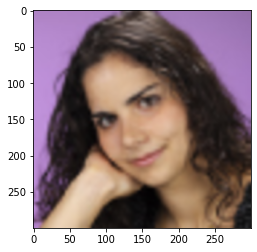

In [ ]:
image1 = load_img('data/train/0_female/26945-large.png')
#image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
image_gen.flow_from_directory('data/train/')

Found 11663 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('data/test/')

Found 2920 images belonging to 2 classes.


In [ ]:
# width,height,channels
image_shape = (64,64,3)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [ ]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('data/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 11663 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory('data/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 11663 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'0_female': 0, '1_male': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=10,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/10
150/150 [==============================] - 23s 156ms/step - loss: 0.6942 - accuracy: 0.5063 - val_loss: 0.7366 - val_accuracy: 0.4427
Epoch 2/10
150/150 [==============================] - 22s 148ms/step - loss: 0.6846 - accuracy: 0.5713 - val_loss: 0.6647 - val_accuracy: 0.6146
Epoch 3/10
150/150 [==============================] - 22s 148ms/step - loss: 0.6547 - accuracy: 0.6265 - val_loss: 0.7789 - val_accuracy: 0.6719
Epoch 4/10
150/150 [==============================] - 22s 148ms/step - loss: 0.6180 - accuracy: 0.6600 - val_loss: 0.8116 - val_accuracy: 0.6615
Epoch 5/10
150/150 [==============================] - 22s 146ms/step - loss: 0.6187 - accuracy: 0.6479 - val_loss: 0.5944 - val_accuracy: 0.6771
Epoch 6/10
150/150 [==============================] - 22s 148ms/step - loss: 0.6012 - accuracy: 0.6667 - val_loss: 0.5415 - val_accuracy: 0.7344
Epoch 7/10
150/150 [==============================] - 23s 157ms/step - loss: 0.5807 - accuracy: 0.6828 - val_loss: 0.7240 - val_ac

In [ ]:
#Transfer learning

In [ ]:
import keras

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 21s 0us/step


In [ ]:
vgg16_model.summary()

#looking at the last (output) layer we can see that it has 1000 outputs

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#transfroming it to a sequantial model and iterate through the previous vgg16 model into the sequantial model. 
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
# deleting the output layer with 1000 outputs
model.layers.pop()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
# the false freezes the train model
for layer in model.layers:
    layer.trainable = False

In [ ]:
# adding an output shape of 2 to the model
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
train_path = 'data/train'
test_path = 'data/test'

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['male', 'female'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['male', 'female'], batch_size=10)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
model.fit_generator(train_batches, 
                    steps_per_epoch=4, 
                    #validation_split=0.2, 
                    epochs=5, 
                    verbose=2)

Epoch 1/5
